In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
gsea_folders = sorted([x for x in os.listdir('/DATA/users/magnitov/znf143/rnaseq/gsea/') if 'Gsea' in x])
gsea_folders = [x for x in gsea_folders if 'GO_BP' in x or 'GO_CC' in x or 'Hallmarks' in x]

gsea_data_24H = pd.DataFrame()
for folder in [x for x in gsea_folders if '24H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_24H = pd.concat([gsea_data_24H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_24H.columns = ['NAME', 'SIZE', 'NES_24H', 'FDR_24H']

gsea_data_48H = pd.DataFrame()
for folder in [x for x in gsea_folders if '48H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_48H = pd.concat([gsea_data_48H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_48H.columns = ['NAME', 'SIZE', 'NES_48H', 'FDR_48H']

gsea_data_72H = pd.DataFrame()
for folder in [x for x in gsea_folders if '72H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_72H = pd.concat([gsea_data_72H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_72H.columns = ['NAME', 'SIZE', 'NES_72H', 'FDR_72H']

gsea_data = gsea_data_24H.merge(gsea_data_48H, on = ['NAME']).merge(gsea_data_72H, on = ['NAME'])
gsea_data = gsea_data[[x for x in gsea_data.columns if 'SIZE' not in x]]
gsea_data.head()

,NAME,NES_24H,FDR_24H,NES_48H,FDR_48H,NES_72H,FDR_72H
0,GOBP_SKELETAL_SYSTEM_MORPHOGENESIS,2.035292,0.007038,1.907737,0.026859,1.988507,0.015863
1,GOBP_REGULATION_OF_CARDIOCYTE_DIFFERENTIATION,2.007786,0.007609,2.063422,0.002310,2.182362,0.000000
2,GOBP_REPRODUCTIVE_BEHAVIOR,2.007013,0.005142,1.948095,0.025253,1.908019,0.030634
3,GOBP_TOLERANCE_INDUCTION,2.005799,0.004014,1.755751,0.072087,1.457369,0.274108
4,GOBP_MATING_BEHAVIOR,2.000117,0.004176,1.91254,0.027288,1.898843,0.029091


In [4]:
gsea_data.to_csv('./annotations/gsea_rnaseq_long_term_depletion.tsv', sep = '\t', header = 1, index = 0)

## GSEA results analysis

In [ ]:
gsea_data = pd.read_csv('./annotations/gsea_rnaseq_long_term_depletion.tsv', sep = '\t')
gsea_data.head()

In [5]:
gsea_data_significant = gsea_data[(gsea_data['FDR_24H'] < 0.1) | (gsea_data['FDR_48H'] < 0.1) | (gsea_data['FDR_72H'] < 0.1)]
gsea_data_significant.sort_values(['NES_24H'])

,NAME,NES_24H,FDR_24H,NES_48H,FDR_48H,NES_72H,FDR_72H
5108,GOBP_NADH_METABOLIC_PROCESS,-2.160068,0.006056,-2.1222816,0.006043,-2.006613,0.021085
5109,GOBP_NAD_METABOLIC_PROCESS,-2.111334,0.009903,-2.0394645,0.018205,-1.843484,0.123711
5110,GOBP_HEXOSE_CATABOLIC_PROCESS,-2.081725,0.013149,-2.329136,0.000127,-2.342234,0.000367
5111,GOBP_TRANSLATION_AT_SYNAPSE,-2.068486,0.013076,-1.9135519,0.091152,-2.123499,0.003397
5112,GOBP_GLYCOLYTIC_PROCESS_THROUGH_FRUCTOSE_6_PHO...,-2.004150,0.037467,-2.221011,0.001215,-2.260569,0.000689
...,...,...,...,...,...,...,...
2,GOBP_REPRODUCTIVE_BEHAVIOR,2.007013,0.005142,1.948095,0.025253,1.908019,0.030634
1,GOBP_REGULATION_OF_CARDIOCYTE_DIFFERENTIATION,2.007786,0.007609,2.063422,0.002310,2.182362,0.000000
0,GOBP_SKELETAL_SYSTEM_MORPHOGENESIS,2.035292,0.007038,1.907737,0.026859,1.988507,0.015863
7767,GOCC_ENDOPLASMIC_RETICULUM_EXIT_SITE,2.040845,0.000375,1.60551,0.123671,1.289557,0.465129


In [6]:
gsea_data_significant[gsea_data_significant['NES_24H'] < 0]['NAME'].values

array(['GOBP_NADH_METABOLIC_PROCESS', 'GOBP_NAD_METABOLIC_PROCESS',
       'GOBP_HEXOSE_CATABOLIC_PROCESS', 'GOBP_TRANSLATION_AT_SYNAPSE',
       'GOBP_GLYCOLYTIC_PROCESS_THROUGH_FRUCTOSE_6_PHOSPHATE',
       'GOBP_CYTOPLASMIC_TRANSLATION', 'GOBP_GLUCOSE_CATABOLIC_PROCESS',
       'GOBP_GLYCERALDEHYDE_3_PHOSPHATE_METABOLIC_PROCESS',
       'GOBP_GLYCOLYTIC_PROCESS_THROUGH_GLUCOSE_6_PHOSPHATE',
       'GOBP_MONOSACCHARIDE_CATABOLIC_PROCESS',
       'GOBP_GLYCERALDEHYDE_3_PHOSPHATE_BIOSYNTHETIC_PROCESS',
       'GOBP_PROTON_MOTIVE_FORCE_DRIVEN_ATP_SYNTHESIS',
       'GOBP_PYRIDINE_CONTAINING_COMPOUND_CATABOLIC_PROCESS',
       'GOBP_NEGATIVE_REGULATION_OF_MITOCHONDRIAL_FUSION',
       'GOBP_ALPHA_AMINO_ACID_CATABOLIC_PROCESS',
       'GOBP_DNA_STRAND_ELONGATION_INVOLVED_IN_DNA_REPLICATION',
       'GOBP_CELL_CYCLE_DNA_REPLICATION',
       'GOBP_DNA_TEMPLATED_DNA_REPLICATION',
       'GOBP_NEGATIVE_REGULATION_OF_CHEMOKINE_PRODUCTION',
       'GOBP_NEGATIVE_REGULATION_OF_MUSCLE_ADAPTATION'

In [7]:
gsea_data_significant[gsea_data_significant['NES_24H'] > 0]['NAME'].values

array(['GOBP_SKELETAL_SYSTEM_MORPHOGENESIS',
       'GOBP_REGULATION_OF_CARDIOCYTE_DIFFERENTIATION',
       'GOBP_REPRODUCTIVE_BEHAVIOR', 'GOBP_TOLERANCE_INDUCTION',
       'GOBP_MATING_BEHAVIOR',
       'GOBP_EMBRYONIC_SKELETAL_SYSTEM_MORPHOGENESIS',
       'GOBP_EMBRYONIC_SKELETAL_SYSTEM_DEVELOPMENT',
       'GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_ANTIGEN',
       'GOBP_POSITIVE_REGULATION_OF_CD8_POSITIVE_ALPHA_BETA_T_CELL_ACTIVATION',
       'GOBP_NEURON_FATE_COMMITMENT', 'GOBP_SPINAL_CORD_DEVELOPMENT',
       'GOBP_INTERLEUKIN_4_PRODUCTION',
       'GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I',
       'GOBP_POSITIVE_REGULATION_OF_ACUTE_INFLAMMATORY_RESPONSE',
       'GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_ENDOGENOUS_ANTIGEN',
       'GOBP_REGULATION_OF_INTERLEUKIN_4_PRODUCTION',
       'GOBP_NATURAL_KILLER_CELL_PROLIFERATION',
       'GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_VIA_MHC_CLASS_IB',
       'GOBP_REGULATION_OF_NATURAL_KI

In [10]:
terms_to_plot = ['GOBP_CYTOPLASMIC_TRANSLATION', 'GOBP_MITOCHONDRIAL_TRANSLATION', 'GOCC_CYTOSOLIC_RIBOSOME', 'GOCC_ORGANELLAR_RIBOSOME', 
                 'GOCC_RESPIRASOME', 'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'HALLMARK_GLYCOLYSIS',
                 'HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY', 'HALLMARK_FATTY_ACID_METABOLISM',
                 'HALLMARK_MYC_TARGETS_V1', 'HALLMARK_MYC_TARGETS_V2',
                 'HALLMARK_E2F_TARGETS', 'HALLMARK_G2M_CHECKPOINT',
                 'GOBP_ENERGY_HOMEOSTASIS', 'HALLMARK_INFLAMMATORY_RESPONSE', 'HALLMARK_APOPTOSIS',
                 'HALLMARK_P53_PATHWAY', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_WNT_BETA_CATENIN_SIGNALING']

gsea = gsea_data[gsea_data['NAME'].isin(terms_to_plot)]
for col in gsea.columns[1:]:   
    gsea[col] = [float(x) for x in gsea[col]]
gsea.sort_values(by = 'NAME', key=lambda column: column.map(lambda e: terms_to_plot.index(e)), inplace = True)
gsea

,NAME,NES_24H,FDR_24H,NES_48H,FDR_48H,NES_72H,FDR_72H
5113,GOBP_CYTOPLASMIC_TRANSLATION,-1.978689,0.050509,-1.971785,0.044266,-2.133495,0.003227
5122,GOBP_MITOCHONDRIAL_TRANSLATION,-1.819899,0.251920,-1.814857,0.178235,-1.806117,0.151881
8268,GOCC_CYTOSOLIC_RIBOSOME,-1.742554,0.164602,-1.760800,0.111439,-1.945564,0.016746
8269,GOCC_ORGANELLAR_RIBOSOME,-1.734973,0.168165,-1.829400,0.059573,-1.814109,0.069345
8266,GOCC_RESPIRASOME,-1.749015,0.177223,-1.964173,0.015429,-1.851141,0.060778
8825,HALLMARK_OXIDATIVE_PHOSPHORYLATION,-1.944707,0.000535,-2.213760,0.000000,-1.991786,0.000511
8830,HALLMARK_GLYCOLYSIS,-1.048614,0.779827,-1.308344,0.098880,-1.408179,0.061750
8829,HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY,-1.048881,0.908473,-1.501219,0.037576,-1.564027,0.019971
8833,HALLMARK_FATTY_ACID_METABOLISM,-0.999390,0.719403,-1.471072,0.039544,-1.344718,0.089484
8824,HALLMARK_MYC_TARGETS_V1,-1.979428,0.000459,-2.425270,0.000000,-2.514975,0.000000


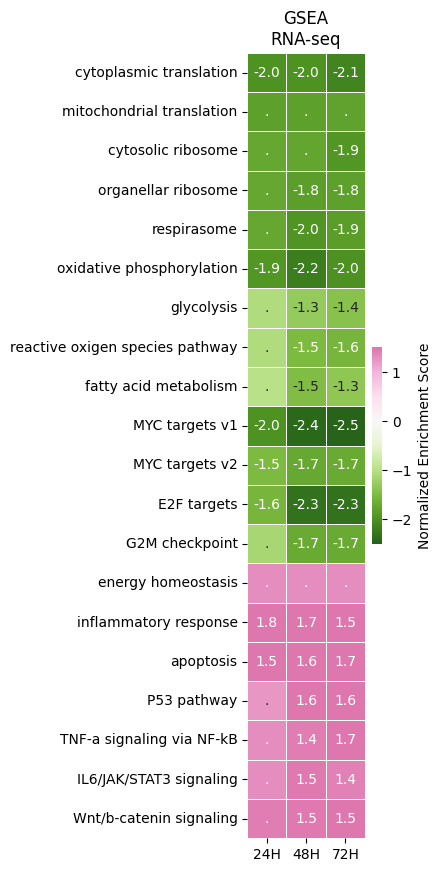

In [11]:
mask = gsea[['FDR_24H', 'FDR_48H', 'FDR_72H']] >= 0.1
mask_annotation = np.reshape(['.' if x==True else round(y, 1) for (x, y) in zip(mask.values.flatten(), gsea[['NES_24H', 'NES_48H', 'NES_72H']].values.flatten())], (len(gsea), 3))

plt.figure(figsize = (1.9, 10.2))
plt.title('GSEA\nRNA-seq')
sns.heatmap(gsea[['NES_24H', 'NES_48H', 'NES_72H']], cmap = 'PiYG_r', center = 0, vmin = -2.5, vmax = 1.5, xticklabels = ['24H', '48H', '72H'], 
            yticklabels = [' '.join(x.split('_')[1:]).lower().replace('myc ', 'MYC ').replace('e2f', 'E2F').replace('g2m', 'G2M').replace('p53', 'P53').replace('il6 jak stat3', 'IL6/JAK/STAT3').replace('tnfa', 'TNF-a').replace('nfkb', 'NF-kB').replace('wnt beta ', 'Wnt/b-') for x in gsea['NAME'].values], 
            annot = np.array(mask_annotation), fmt='s', cbar = 2, cbar_kws = {'shrink': 0.25, 'label': 'Normalized Enrichment Score'}, linewidth = 0.5)
plt.tight_layout()
plt.show()